### load modules

In [1]:
%matplotlib inline
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import xarray
import pandas as pd
from matplotlib.dates import DateFormatter

In [2]:
plt.rc('font',size=16)

### define paths

In [3]:
dataPath = '/glade2/scratch2/domingom/Cheyenne/XPIA_mesoLES/SIMULS/'
outPath  = '/glade/scratch/doubrawa/postProcessing/'

In [15]:
dataPaths = {
    'LES_25'  :'/glade/scratch/doubrawa/postProcessing',
    'LES_100' :'/glade/scratch/doubrawa/postProcessing',
    'LES_333' :'/glade/scratch/doubrawa/VLES',
    'SH_333'  :'/glade/scratch/doubrawa/SH',
    'MYNN_333':'/glade/scratch/doubrawa/MYNN'}

define some parameters

In [4]:
# domainId     = 3
# procId       = 1021
# j            = 13
# i            = 20

domainId     = 4
procId       = 1180
j            = 26
i            = 15

variables    = ['U','V','W','T','PH','PHB','HGT','RMOL']
prefix       = 'LES_25m' if domainId==4 else 'LES_100m'

read in domingo's data

In [5]:
day           = 27
firstTime     = 1             

for hour in range(14,24):

    for half_hour_idx in [1,2]:

        wrfoutPath    = glob.glob(os.path.join(dataPath,
                               'WRF_mesoLES_4dom_RAP_2015_03_{0}_mesoLES'.format(day),
                               'HOUR_{0}_{1}'.format(hour,half_hour_idx),
                               'wrfout_d0{0}_2015-03-*_{1:04d}'.format(domainId,procId)))
        print os.path.split(wrfoutPath[0])[-1]

        #
        # Read in the data, and grab U/V
        #
        ncfile = xarray.open_dataset(wrfoutPath[0])
        
        ncfile['west_east'] = ncfile.west_east
        ncfile['west_east_stag'] = ncfile.west_east_stag
        
        ncfile['south_north'] = ncfile.south_north        
        ncfile['south_north_stag'] = ncfile.south_north_stag
        
        ncfile['bottom_top'] = ncfile.bottom_top
        ncfile['bottom_top_stag'] = ncfile.bottom_top_stag

        
        varNow = ncfile[variables].isel(west_east=i, west_east_stag=i,
                                        south_north=j, south_north_stag=j,
                                        bottom_top=range(60), bottom_top_stag=range(60))
        
        if 'T' in variables:
            # I got this + 300 K from share/wrf_timeseries.F
            varNow['T'].data = varNow['T'].data + 300.0

        if firstTime:
            var = varNow
            firstTime = 0
        else:
            var = xarray.concat([var,varNow],dim='Time')

wrfout_d04_2015-03-28_14:00:10_1180
wrfout_d04_2015-03-28_14:30:10_1180
wrfout_d04_2015-03-28_15:00:10_1180
wrfout_d04_2015-03-28_15:30:10_1180
wrfout_d04_2015-03-28_16:00:10_1180
wrfout_d04_2015-03-28_16:30:10_1180
wrfout_d04_2015-03-28_17:00:10_1180
wrfout_d04_2015-03-28_17:30:10_1180
wrfout_d04_2015-03-28_18:00:10_1180
wrfout_d04_2015-03-28_18:30:10_1180
wrfout_d04_2015-03-28_19:00:10_1180
wrfout_d04_2015-03-28_19:30:10_1180
wrfout_d04_2015-03-28_20:00:10_1180
wrfout_d04_2015-03-28_20:30:10_1180
wrfout_d04_2015-03-28_21:00:10_1180
wrfout_d04_2015-03-28_21:30:10_1180
wrfout_d04_2015-03-28_22:00:10_1180
wrfout_d04_2015-03-28_22:30:10_1180
wrfout_d04_2015-03-28_23:00:10_1180
wrfout_d04_2015-03-28_23:30:10_1180


read in my data

In [246]:
simKey = 'MYNN_333'

In [247]:
variables    = ['U','V','W','T','PH','PHB','HGT','RMOL','PBLH']

In [248]:
day           = 27
firstTime     = 1             

wrfoutPaths   = sorted(glob.glob(os.path.join(dataPaths[simKey],'03{0}15'.format(day+1),'wrfout_d03*'.format(domainId))))

for wrfoutPath in wrfoutPaths:
    print os.path.split(wrfoutPath)[-1]

    #
    # Read in the (meta)data
    #
    ncfile = xarray.open_dataset(wrfoutPath)

    #
    # Define some coordinates for the xarrays
    #
    ncfile['west_east'] = ncfile.west_east
    ncfile['west_east_stag'] = ncfile.west_east_stag

    ncfile['south_north'] = ncfile.south_north        
    ncfile['south_north_stag'] = ncfile.south_north_stag

    ncfile['bottom_top'] = ncfile.bottom_top
    ncfile['bottom_top_stag'] = ncfile.bottom_top_stag

        
    varNow = ncfile[variables].isel(west_east=i, west_east_stag=i,
                                    south_north=j, south_north_stag=j,
                                    bottom_top=range(60), bottom_top_stag=range(60))
        
    if 'T' in variables:
        # I got this + 300 K from share/wrf_timeseries.F
        varNow['T'].data = varNow['T'].data + 300.0

    if firstTime:
        gz = varNow
        firstTime = 0
    else:
        gz = xarray.concat([gz,varNow],dim='Time')

wrfout_d03_2015-03-28_12:30:00
wrfout_d03_2015-03-28_13:00:00
wrfout_d03_2015-03-28_13:30:00
wrfout_d03_2015-03-28_14:00:00
wrfout_d03_2015-03-28_14:30:00
wrfout_d03_2015-03-28_15:00:00
wrfout_d03_2015-03-28_15:30:00
wrfout_d03_2015-03-28_16:00:00
wrfout_d03_2015-03-28_16:30:00
wrfout_d03_2015-03-28_17:00:00
wrfout_d03_2015-03-28_17:30:00
wrfout_d03_2015-03-28_18:00:00
wrfout_d03_2015-03-28_18:30:00
wrfout_d03_2015-03-28_19:00:00
wrfout_d03_2015-03-28_19:30:00
wrfout_d03_2015-03-28_20:00:00
wrfout_d03_2015-03-28_20:30:00
wrfout_d03_2015-03-28_21:00:00
wrfout_d03_2015-03-28_21:30:00
wrfout_d03_2015-03-28_22:00:00
wrfout_d03_2015-03-28_22:30:00
wrfout_d03_2015-03-28_23:00:00
wrfout_d03_2015-03-28_23:30:00
wrfout_d03_2015-03-29_00:00:00


compute z and make an array of T

In [75]:
#
# calculate actual height above ground
#
z2d = ((var['PH'].data + var['PHB'].data)/9.81 - (var['HGT'].data[:,np.newaxis])).T

#
# based on min/max height, make a regular vector of heights for the mesh
#
zmin, zmax = np.min(z2d), np.max(z2d)
z1d        = np.arange(zmin, zmax, 5.0)
nz         = len(z1d)

#
# also get time information and make a regular vector of times for the mesh
#
nz, nt    = z2d.shape
t1d       = range(nt)
t1d_smart = var['PH']['XTIME'].values

#
# make the mesh
#
[zMesh,tMesh] = np.meshgrid(t1d_smart,z1d)

#
# allocate space to hold values of theta, then fill it up
#
array = np.zeros((nz,nt))
for it in range(nt):
    array[:,it] = np.interp(z1d,z2d[:,it],var['T'].data[it,:])

Estimate pbl height from LES

Attempt 1

In [190]:
grad = np.diff(array,axis=0)/(np.diff(z1d)[:,np.newaxis])
zi   = np.zeros((nt))

for it in range(nt):
    i           = 0
    sorted_args = np.argsort(grad[:,it])[::-1]    
    args_list   = [sorted_args[i]]
    while (np.abs(sorted_args[i+1]-sorted_args[i])<2):
        args_list.append(sorted_args[i+1])
        i +=1
    zi_k   = int(np.round(np.median(args_list)))
    zi[it] = z1d[1:][zi_k]    

Attempt 2

In [243]:
grad = np.diff(array,axis=0)/(np.diff(z1d)[:,np.newaxis])
zi   = np.zeros((nt))

for it in range(nt):
    
    # get signs of dt/dz
    asign          = np.sign(grad[:,it])

    # get rid of first -1 entries which do not signal a shift from positive to negative theta
    first_idx      = np.where(asign == 1)[0][0]
    asign          = asign[first_idx:].copy()
    
    # now identify first point where we go from 1 to -1
    idx_signchange = np.where(asign == -1)
    
    if len(idx_signchange[0])==0:
        print it, "no negatives"
        zi[it] = np.nan
    else:        
        zi_k   = idx_signchange[0][0]
        zi[it] = z1d[1:][zi_k]    
        print it, zi_k

0 16
1 10
2 16
3 8
4 7
5 7
6 7
7 7
8 7
9 8
10 8
11 26
12 39
13 43
14 48
15 48
16 59
17 249
18 30
19 8
20 7
21 7
22 7
23 7
24 7
25 7
26 26
27 26
28 23
29 10
30 8
31 7
32 5
33 5
34 5
35 7
36 13
37 10
38 10
39 8
40 8
41 16
42 22
43 22
44 22
45 13
46 13
47 10
48 10
49 10
50 10
51 10
52 10
53 10
54 10
55 10
56 10
57 13
58 16
59 19
60 43
61 48
62 48
63 53
64 26
65 26
66 30
67 53
68 8
69 8
70 7
71 7
72 8
73 10
74 10
75 10
76 9
77 7
78 7
79 7
80 7
81 7
82 7
83 7
84 8
85 8
86 8
87 7
88 7
89 7
90 7
91 5
92 5
93 5
94 5
95 5
96 5
97 5
98 13
99 12
100 10
101 10
102 10
103 10
104 10
105 10
106 10
107 10
108 no negatives
109 no negatives
110 101
111 101
112 10
113 10
114 10
115 10
116 10
117 15
118 15
119 16
120 16
121 59
122 59
123 59
124 12
125 10
126 10
127 13
128 13
129 13
130 13
131 13
132 16
133 no negatives
134 65
135 65
136 100
137 78
138 72
139 72
140 93
141 93
142 150
143 no negatives
144 155
145 157
146 2
147 43
148 45
149 51
150 51
151 51
152 41
153 41
154 41
155 41
156 no negatives
157 2

1231 33
1232 7
1233 15
1234 22
1235 31
1236 2
1237 17
1238 17
1239 9
1240 5
1241 3
1242 8
1243 7
1244 6
1245 9
1246 13
1247 16
1248 6
1249 6
1250 6
1251 13
1252 12
1253 11
1254 15
1255 25
1256 25
1257 56
1258 56
1259 50
1260 36
1261 10
1262 5
1263 9
1264 11
1265 13
1266 15
1267 17
1268 31
1269 5
1270 2
1271 60
1272 52
1273 54
1274 25
1275 12
1276 12
1277 11
1278 10
1279 18
1280 9
1281 3
1282 3
1283 31
1284 28
1285 6
1286 7
1287 26
1288 15
1289 21
1290 28
1291 26
1292 6
1293 12
1294 13
1295 13
1296 23
1297 31
1298 33
1299 10
1300 13
1301 20
1302 28
1303 55
1304 5
1305 3
1306 7
1307 14
1308 7
1309 9
1310 10
1311 5
1312 3
1313 6
1314 26
1315 26
1316 14
1317 9
1318 71
1319 39
1320 62
1321 48
1322 11
1323 9
1324 8
1325 9
1326 11
1327 15
1328 3
1329 30
1330 25
1331 6
1332 47
1333 43
1334 20
1335 16
1336 8
1337 8
1338 9
1339 9
1340 17
1341 23
1342 27
1343 28
1344 31
1345 30
1346 7
1347 4
1348 31
1349 30
1350 9
1351 31
1352 22
1353 8
1354 12
1355 12
1356 13
1357 32
1358 25
1359 3
1360 10
1361 

2455 40
2456 7
2457 16
2458 10
2459 6
2460 7
2461 13
2462 14
2463 11
2464 31
2465 21
2466 9
2467 6
2468 14
2469 23
2470 17
2471 5
2472 60
2473 34
2474 9
2475 19
2476 2
2477 9
2478 11
2479 1
2480 6
2481 3
2482 4
2483 10
2484 10
2485 6
2486 6
2487 11
2488 11
2489 10
2490 3
2491 14
2492 24
2493 37
2494 9
2495 11
2496 6
2497 6
2498 11
2499 5
2500 64
2501 34
2502 15
2503 9
2504 9
2505 26
2506 27
2507 20
2508 16
2509 12
2510 5
2511 22
2512 26
2513 26
2514 89
2515 25
2516 47
2517 21
2518 13
2519 22
2520 28
2521 17
2522 23
2523 25
2524 2
2525 12
2526 3
2527 6
2528 18
2529 18
2530 15
2531 6
2532 7
2533 11
2534 39
2535 14
2536 20
2537 5
2538 12
2539 6
2540 5
2541 6
2542 9
2543 10
2544 13
2545 11
2546 6
2547 6
2548 37
2549 15
2550 18
2551 3
2552 12
2553 3
2554 10
2555 17
2556 8
2557 20
2558 23
2559 26
2560 18
2561 31
2562 36
2563 40
2564 11
2565 10
2566 13
2567 13
2568 35
2569 7
2570 7
2571 23
2572 11
2573 28
2574 5
2575 6
2576 2
2577 75
2578 9
2579 12
2580 16
2581 4
2582 9
2583 9
2584 7
2585 21


visualize

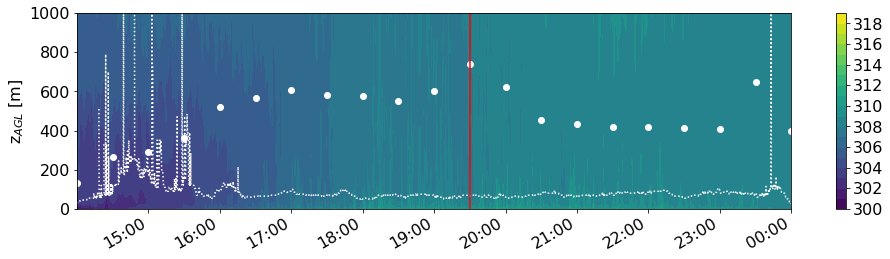

In [271]:
fig = plt.figure(figsize=(16,4))
ax  = fig.add_subplot(111)

#
# potential temperature from LES
#
p   = ax.contourf(zMesh,tMesh,array,levels=np.arange(300,320,1))
plt.colorbar(p)

#
# pblh from a gray-zone simulation with a pbl scheme
#
xaxis = gz['PBLH']['XTIME'].values
yaxis = gz['PBLH'].data
ax.plot(xaxis,yaxis,'ow')

xaxis = gz['PBLH']['XTIME'].values
yaxis = gz['PBLH'].data
ax.plot(t1d_smart,medfilt(zi,101),':w')

ax.set_ylim([0,1000])
ax.set_xlim([t1d_smart[0],t1d_smart[-1]])

ax.axvline(x=t1d_smart[1980],color='r')

ax.set_ylabel('z$_{{AGL}}$ [m]')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
fig.autofmt_xdate()

In [2]:
3*9+8

35

In [135]:
from scipy.signal import medfilt

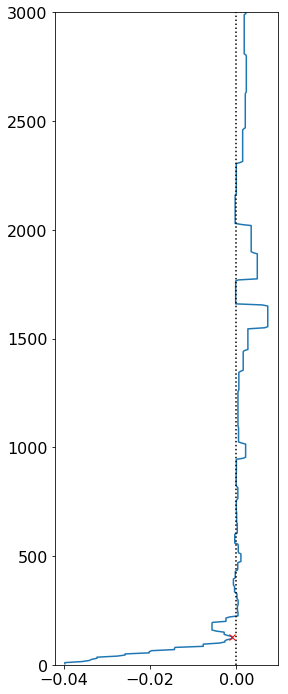

In [270]:
it = 1400

plt.figure(figsize=(4,12))
plt.plot(grad[:,it],z1d[1:])
# plt.axvline(x=np.max(grad[:,it]))
plt.axvline(x=0.,color='k',linestyle=':')
plt.ylim([0,3000])
for pt in [25]:
    plt.plot(grad[pt,it],z1d[1:][pt],'xr')  

In [235]:
asign          = np.sign(grad[:,it])
signchange     = ((np.roll(asign, 1) - asign) != 0).astype(int)

In [238]:
asign[0:40]

array([-1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.])

In [236]:
np.where(asign<=0)

(array([   0,    1,    2,    3,    4,   26,   27,   28,   29,   30,   31,
          32,   33,  150,  151,  152,  153,  154,  155,  156,  157,  158,
         159,  160,  161, 1269, 1270, 1271, 1272]),)

In [221]:
grad[20:30,it]

array([0.00104018, 0.00104018, 0.00071636, 0.00055172, 0.00055172,
       0.0005486 , 0.00029714, 0.00029714, 0.00029714, 0.00030273])